<a href="https://colab.research.google.com/github/aswinaus/Reinforcement-Learning/blob/main/RL_Policy_Loss.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In RL, a policy is the strategy the agent uses to decide what action to take in a given state:


π(a∣s)=Probability of taking action a in state s

This can be a simple table, or more commonly in deep RL, a neural network that outputs probabilities (a tensor of action preferences).

**Policy Loss**:

It's the loss function used to train the policy network, similar to how MSE loss is used in supervised learning.

Policy loss formula (e.g., in REINFORCE):

Policy Loss=−log(π(a∣s))⋅R

Where:

π(a∣s): Probability of action a under current policy in state s

𝑅
R: Reward received

Loss is multiplied by -1 because we're using gradient descent, but we want to maximize reward.

**Policy Gradient Descent**:

 This refers to optimizing the policy parameters by minimizing the negative of the expected reward. Since minimizing the negative expected reward is the same as maximizing the expected reward, this is an equivalent approach. The update rule would look something like:

parameters = parameters - learning_rate * ( -policy_gradient)

which simplifies back to parameters = parameters + learning_rate * policy_gradient.

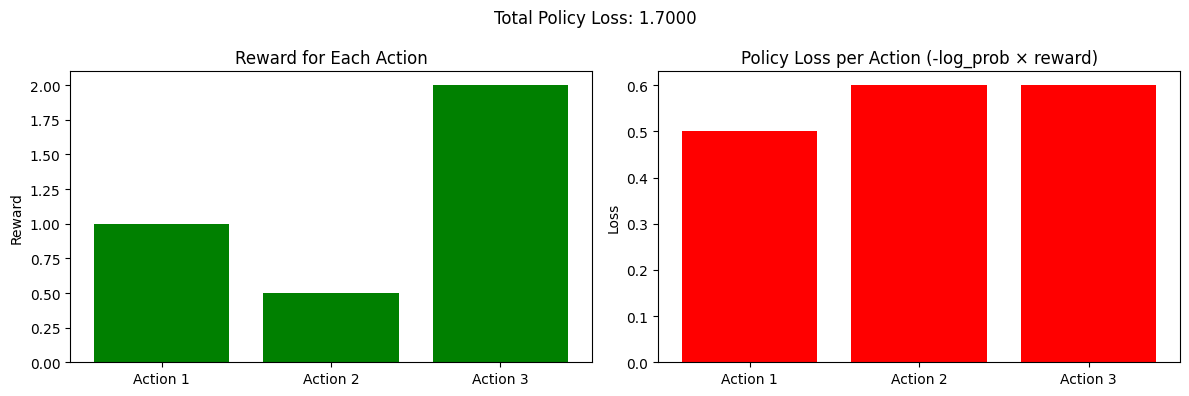

In [1]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

# Simulated log probabilities from a policy (e.g., output of a softmax)
log_probs = torch.tensor([[-0.5], [-1.2], [-0.3]])  # log(π(a|s)) for 3 actions taken

# Simulated rewards received for each action
rewards = torch.tensor([1.0, 0.5, 2.0])

# Calculate the policy loss: -log_prob * reward
policy_loss = -log_probs.squeeze() * rewards
total_loss = policy_loss.sum()

# Visualize each component
actions = ['Action 1', 'Action 2', 'Action 3']
loss_values = policy_loss.detach().numpy()
reward_values = rewards.numpy()

# Plot the loss per action
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

ax[0].bar(actions, reward_values, color='green')
ax[0].set_title("Reward for Each Action")
ax[0].set_ylabel("Reward")

ax[1].bar(actions, loss_values, color='red')
ax[1].set_title("Policy Loss per Action (-log_prob × reward)")
ax[1].set_ylabel("Loss")

plt.suptitle(f"Total Policy Loss: {total_loss.item():.4f}")
plt.tight_layout()
plt.show()
